# 161. Генератор точек в круге

Петя написал два генератора точек в круге:

```
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))
```
```
def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)
```

Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.

Для того, чтобы получить ОК по этой задаче, надо предсказать правильный генератор хотя бы для 98 наборов.

**Формат ввода**

Даны 100 строк. Каждая строка отвечает за свой набор точек.

В каждой строке находится 2000 действительных чисел $(-1≤a_i≤1), разделённых пробелом. Точки идут подряд, то есть формат строки: $x_0, y_0, z_1, y_1, ..., x_{999}, y_{999}$

**Формат вывода**

Нужно вывести 100 строк, в каждой из которой должно быть 1 число: 1 или 2, в зависимости от того, первым или вторым генератором был сгенерирован данный набор точек.


## Решение

Если сгенерировать наборы точек каждой функцией и визуализировать их, увидим что плотность облаков получается разная. При генерации набора с помощью 1 функции, точки получаются более сконцентрированы к центру облака, а при генерации 2 функции равномерно распределены по всему объему окружности. На это и основано решение: считается среднее расстояние от точек до центра облака в облаке точек и сравнивается со средним расстояним облако точек, которые мы сгенерировали как эталонное с помощью заданных функций.

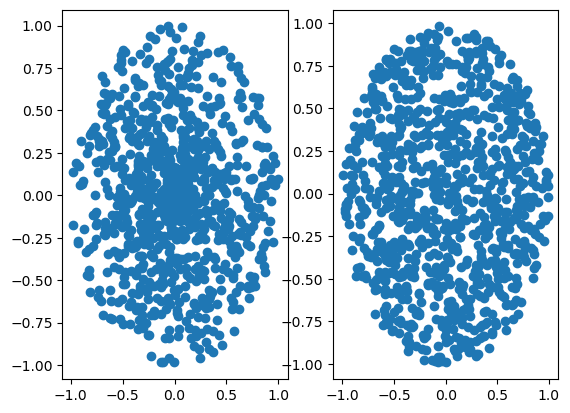

In [8]:
from random import uniform, randint
import matplotlib.pyplot as plt
import sys
from itertools import chain
from math import sqrt, cos, pi, sin
import pandas as pd

def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)

gen_1 = pd.DataFrame([generate1() for _ in range(1000)])
gen_2 = pd.DataFrame([generate2() for _ in range(1000)])

fig, axes = plt.subplots(1, 2)

axes[0].scatter(gen_1.iloc[:,0], gen_1.iloc[:,1])
axes[1].scatter(gen_2.iloc[:,0], gen_2.iloc[:,1])


In [ ]:
import sys
from itertools import chain
from math import sqrt, cos, pi, sin
from random import uniform, randint

def main():
    def generate1():
        a = uniform(0, 1)
        b = uniform(0, 1)
        return (a * cos(2 * pi * b), a * sin(2 * pi * b))
    def generate2():
        while True:
            x = uniform(-1, 1)
            y = uniform(-1, 1)
            if x ** 2 + y ** 2 > 1:
                continue
            return (x, y)

    # функция подсчета расстаяния между точками в 1 наборе
    def avg_distance(points):
        total_distance = 0
        for i in range(0, len(points), 2):
            x = points[i]
            y = points[i+1]
            total_distance += sqrt(x*x + y*y)
        return total_distance / (len(points) / 2)

    # чтение данных из файла
    f = open("input.txt")


    for line in f:
        dots = list(map(float, line.split()))

        # просчет расстаяния для считанной строки (т.е. 1 набора точек)
        avg_distance_for_row = avg_distance(dots)
        avg_dist_2 = avg_distance(list(chain(*[generate2() for _ in range(1000)])))
        avg_dist_1 = avg_distance(list(chain(*[generate1() for _ in range(1000)])))

        # выбор к какой функции относится данное облако точек
        if abs(avg_dist_1 - avg_distance_for_row) < abs(avg_dist_2 - avg_distance_for_row):
            print(1)
        else:
            print(2)


if __name__ == '__main__':
	main()